## Canada - Admissions of Permanent Residents by Country of Citizenship and Immigration Category, January 2015 - December 2020

IRCC also provide the immigration statistics grouped by the immigration category (ie., FSW, CEC, PNP, etc.) for each individual country of citizenship. The information is stored in a compelex table with multiple level of indexing. This notebook demonstrates how to clean up such data and draw some insight using Pandas.

By analyzing the admission data, we try to answer the following questions:

- Question 1: What are the most popupar immigration category for people with citizenship of China?
- Question 2: What are the trend for these categories over time?

In [1]:
import pandas as pd
import os
import xlrd
import matplotlib.pyplot as plt
import numpy as np
from clean_col import clean_col # User defined function
from clean_indx import cleaner # User defined function
from multiplot import multiplot # User defined function


### Loading and examing the raw data

In [2]:
# Loading raw data download from IRCC website
file = os.path.join(os.getcwd(),'ircc_m_pradmiss_0013_e.xls')
# Read data and remove header & footer
data = pd.read_excel(file,skiprow=4,header=[4],skipfooter=5)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Jan,Feb,Mar,Q1 Total,Apr,May,...,Q2 Total.5,Jul.5,Aug.5,Sep.5,Q3 Total.5,Oct.5,Nov.5,Dec.5,Q4 Total.5,Unnamed: 105
0,NaN,NaN,NaN,Atlantic Immigration Pilot Programs,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,Canadian Experience,0,0,0,0,0,0,...,--,0,0,0,0,0,0,0,0,--
2,NaN,NaN,NaN,Caregiver,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,Skilled Worker,5,--,0,5,0,0,...,0,0,0,0,0,--,0,0,--,--
4,NaN,NaN,Worker Program,NaN,5,--,0,5,0,0,...,--,0,0,0,0,--,0,0,--,--


The table contains two parts, the 1st part inclues details for each individual countries, and the 2nd part inclues the summary.

Because of the multi-level indexing and merged cells, there are many NaN values created in the index columns. Simply using the **index_col** argment does not work out due to the abnormal design of the table. Therefore, a custom funtion is design to clean up the data.

In [3]:
#Separate the table into two parts
indv = data.iloc[0:3981,:]
summ = data.iloc[3982:,:]

indv = cleaner(indv) # Clean index with the cleaner function
col_names = [clean_col(i) for i in indv.columns] # Clean column names with the clean_col function
indv.columns = col_names

#Convert all missing value '--' to 0
indv = indv.applymap(lambda x: 0 if x == '--' else int(x))
indv.head()



Jan, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                      
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs          0   
                                                    Canadian Experience                          0   
                                                    Caregiver                                    0   
                                                    Skilled Worker                               5   
                                                    Worker Program                               5   

                                                                                         Feb, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                      
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs          0   
                                                    Canadian Experience                          0   
                                                    Caregiver                                    0   
                                                    Skilled Worker                               0   
                                                    Worker Program                               0   

                                                                                         Mar, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                      
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs          0   
                                                    Canadian Experience                          0   
                                                    Caregiver                                    0   
                                                    Skilled Worker                               0   
                                                    Worker Program                               0   

                                                                                         Q1 Total, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                           
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs               0   
                                                    Canadian Experience                               0   
                                                    Caregiver                                         0   
                                                    Skilled Worker                                    5   
                                                    Worker Program                                    5   

                                                                                         Apr, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                      
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs          0   
                                                    Canadian Experience                          0   
                                                    Caregiver                                    0   
                                                    Skilled Worker                               0   
                                                    Worker Program                               0   

                                                                                         May, 2015  \
Country             Program_Lv1      Program_Lv2    Program_Lv3                                      
Afghanistan - Total Economic - Total Worker Program Atlantic Immigration Pilot Programs          0   
                                                    Canadian Experience                          0   
                                                    Caregiver          

### Checking the data after cleaning

To validate the data cleaning process, a few queries are performed. The data is intact.


In [4]:
indv.loc['Australia - Total','Economic - Total','Worker Program']

,"Jan, 2015","Feb, 2015","Mar, 2015","Q1 Total, 2015","Apr, 2015","May, 2015","Jun, 2015","Q2 Total, 2015","Jul, 2015","Aug, 2015",...,"Q2 Total, 2020","Jul, 2020","Aug, 2020","Sep, 2020","Q3 Total, 2020","Oct, 2020","Nov, 2020","Dec, 2020","Q4 Total, 2020","Total, 2020"
Program_Lv3,,,,,,,,,,,,,,,,,,,,,
Atlantic Immigration Pilot Programs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canadian Experience,30,20,20,70,30,60,30,120,40,40,...,130,20,5,5,30,15,35,10,60,325
Caregiver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Skilled Trade,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,5
Skilled Worker,5,0,0,15,10,10,10,35,25,25,...,10,0,0,0,5,0,0,0,0,65
Worker Program,40,25,25,90,40,70,45,160,65,70,...,145,20,5,10,35,15,35,10,65,400


### Analyze Data

Question 1: What are the most popupar immigration category for people with citizenship of China?

In [5]:
# Get the information for China
China = indv.loc['China, People\'s Republic of - Total'][['Total, 2015','Total, 2016','Total, 2017','Total, 2018','Total, 2019','Total, 2020']]
China


Program_Lv3                                                       
Economic - Total                                   Worker Program                                     Atlantic Immigration Pilot Programs                           5   
                                                                                                      Canadian Experience                                        3490   
                                                                                                      Caregiver                                                   375   
                                                                                                      Skilled Trade                                                15   
                                                                                                      Skilled Worker                                             2630   
                                                                                                      Worker Program                                             6515   
                                                   Business                                           Entrepreneur                                                 80   
                                                                                                      Investor                                                   2250   
                                                                                                      Self-Employed                                                10   
                                                                                                      Start-up Business                                            30   
                                                                                                      Business                                                   2375   
                                                   Provincial Nominee Program                         Provincial Nominee Program                                 8980   
                                                                                                      Provincial Nominee Program                                 8980   
                                                   Economic - Total                                   Economic - Total                                          17870   
Sponsored Family - Total                           Sponsored Family                                   Sponsored Children                                          205   
                                                                                                      Sponsored Extended Family Member                              0   
                                                                                                      Sponsored Parent or Grandparent                            6540   
                                                                                                      Sponsored Spouse or Partner                                4420   
                                                                                                      Sponsored Family                                          11170   
                                                   Sponsored Family - Total                           Sponsored Family - Total                                  11170   
Resettled Refugee & Protected Person in Canada ... Resettled Refugee                                  Blended Sponsorship Refugee                                   0   
                                                                                                      Government-Assisted Refugee                                  20   
                                                                                                      Privately Sponsored Refugee                                   0   
                                              

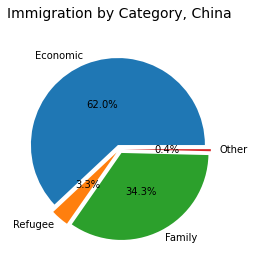

In [6]:
#Since there are too many sub-categories, the Program_Lv1 is used to generate the pie chart
Economic = China.loc['Economic - Total','Economic - Total','Economic - Total'].values[0]
Sponsored_Family = China.loc['Sponsored Family - Total','Sponsored Family - Total','Sponsored Family - Total'].values[0]
Refugee_Protected_Person = China.loc['Resettled Refugee & Protected Person in Canada - Total','Resettled Refugee & Protected Person in Canada - Total','Resettled Refugee & Protected Person in Canada - Total'].values[0]
Other = China.loc['All Other Immigration - Total','All Other Immigration - Total','All Other Immigration - Total'].values[0]

pie = [sum(Economic),sum(Refugee_Protected_Person),sum(Sponsored_Family),sum(Other)]
plt.pie(x=pie, autopct="%.1f%%", explode=[0.05]*4, labels=['Economic','Refugee','Family','Other'], pctdistance=0.5)
plt.title("Immigration by Category, China\n", fontsize=14);


Question 2: What are the trend for these categories over time?

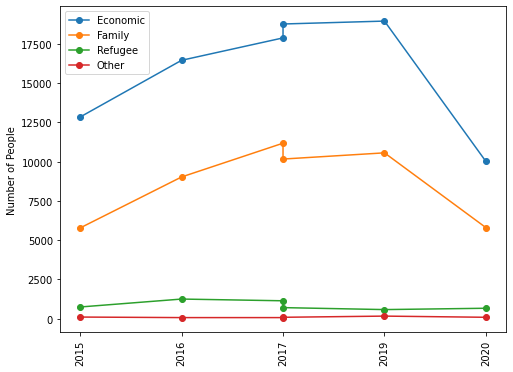

In [7]:
trend = pd.DataFrame([Economic,Sponsored_Family,Refugee_Protected_Person,Other],columns=['2015','2016','2017','2017','2019','2020'],
index = ['Economic','Family','Refugee','Other'])

plt.figure(figsize=(8,6))
plt.ylabel('Number of People')
multiplot(trend)